# Case 3. Heart Disease Classification 
    Cognitive Systems for Health Technology Applications
    19.3.2019, Emil Rantanen ja Wille Tuovinen
    Metropolia University of Applied Sciences

## 1. Objectives

This is the code made for the Case 3 exercise of the Cognitive Systems for Health Technology applications.

The goal of this assignment were to use recurrent and neural networks to process text data and predict ratings from a review text.

Links to codes used to complete this assignment: 

Case 3. Data analysis and first classification experiments
https://github.com/sakluk/cognitive-systems-for-health-technology/blob/master/Week%206.%20Case%203%20-%20First%20classification%20experiments.ipynb

Embedding, LSTM, GRU and Conv1D
https://github.com/sakluk/cognitive-systems-for-health-technology/blob/master/Week%207.%20embedding-lstm-gru-and-conv1d.ipynb

There were also pieces of code based on the previous cases.

# Importing libraries 
Firstly we need to import all the librarys what we a re going to use in this case3.

In [168]:

from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Embedding, LSTM, Bidirectional, Dropout

from keras.preprocessing import sequence
from keras.models import Sequential

#For CNN
from keras.layers import Conv1D, Activation, MaxPooling1D, GlobalAveragePooling1D
from keras import optimizers

import os
print(os.listdir("../../case3_datas"))


['drugsComTest_raw.csv', 'drugsComTrain_raw.csv']


# Create dataframes train and test
Here we create needed dataframes and test-print that the file locations are correct.

In [103]:
test = pd.read_csv(r"../../case3_datas/drugsComTest_raw.csv")
train = pd.read_csv(r"../../case3_datas/drugsComTrain_raw.csv")
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [104]:
test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


Lets print the sahpes on both dataframes to see rwa shapes and size's.

In [156]:
print("Training data shape:", train.shape)
print("Test data shape:", test.shape)
train_shape = train.shape
print(train_shape)

Training data shape: (161297, 8)
Test data shape: (53766, 7)
(161297, 8)


# Create labels based on the original article: Grässer et al. (2018)
### ...Littlebit modified.
firstly Lets create new column where Rating's are categorised into 5 labels, and print to see that it works. And print just the head(20) of data so we can see that the categorization has been success.

In [106]:

r = train['rating']
labels =   1*(( 1 <= r ) & ( r <= 2 )) + 2*(( 3 <= r ) & ( r <= 4 )) \
        +  3*(( 5 <= r ) & ( r <= 6 )) + 4*(( 7 <= r ) & ( r <= 8 )) \
        +  5*(( 9 <= r ) & ( r <= 10)) 
# Add the label column to the data
train['label'] = labels
# Check the new data
train.head(20)

,uniqueID,drugName,condition,review,rating,date,usefulCount,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,5
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,4
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,3
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,4
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,5
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,1
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,1
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,5
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,1
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,4


# Let us check ratings to labels conversion

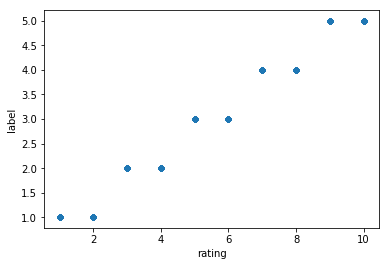

In [107]:
import matplotlib.pyplot as plt
train.plot(x = 'rating', y = 'label', kind = 'scatter')
plt.show()


# Plotting 
Here we plot the distribution of labels

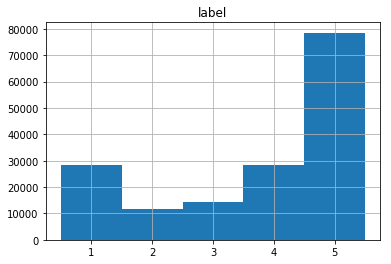

In [108]:
train.hist(column = 'label', bins = np.arange(1, 7), align = 'left');

# Convert reviews to padded sequences
Here we tokenize the training data's "review" column text's into more prosessable form.
Tokenizer class allows to vectorize a text corpus, by turning each text into either a sequence of integers. Later we print the outcome, where we can see how thoe code below changed the text's.

In [109]:

# Read a part of the reviews and create training sequences (x_train)
samples = train['review'].iloc[:10000]
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
x_train = pad_sequences(sequences, maxlen = 500)


# Read a part of the reviews and create testing sequences (x_test)
test_samples = test['review'].iloc[:10000]
test_tokenizer = Tokenizer(num_words = 1000)
test_tokenizer.fit_on_texts(test_samples)
test_sequences = tokenizer.texts_to_sequences(test_samples)
x_test = pad_sequences(test_sequences, maxlen = 500)

# Convert labels to one-hot-categories
In particular, many machine learning algorithms require that their input is numerical and therefore categorical features must be transformed into numerical features before we can use any of these algorithms. One of the most common ways to make this transformation is to one-hot encode the categorical features, what we a re using in this case.

In [110]:

# Convert the labels to one_hot_category values
one_hot_labels = to_categorical(labels[:10000], num_classes = 7)

# Check the shapes
Now we can check how our data-shapes looks like. Se we can see there is 10000x500 review and 10000x7 of labels.

In [111]:
# Check the training and label sets
x_train.shape, one_hot_labels.shape

((10000, 500), (10000, 7))

# Train-data Matrix 
Here it is demostrated how Tokenizer has modified "review" and "label" column's datas to matrixes.

In [112]:
print(one_hot_labels)
print(" ")
print(x_train)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
 
[[  0   0   0 ...  97 148   2]
 [  0   0   0 ...   3 202 332]
 [  0   0   0 ... 371  10  24]
 ...
 [  0   0   0 ... 152   4   7]
 [  0   0   0 ...  11 107 661]
 [  0   0   0 ...  88 220 462]]


# As you can see here has been made a great example
how you can make life easier with functions. In here we use the same plotting commands several times, so create a function for that purpose - Thanks to Sakke  

In [258]:
def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

Similarly create a function for model training, for demonstration purposes we use constant values

In [182]:
def train_model(m0, x, y, e = 10, bs = 32, v = 1, vs = 0.25):
    h1 = m0.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs)
    return h1


# First model
- Embedding layer 
- Flatten 
- Dense classifier
##### 1000 = num_words, 64 = Embedding layers, 500 = sequence length

In [115]:
m0 = Sequential()
m0.add(Embedding(1000, 64, input_length = 500)) 
m0.add(Flatten())
m0.add(Dense(32, activation = 'relu'))
m0.add(Dense(7, activation = 'softmax'))
m0.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
m0.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 500, 64)           64000     
_________________________________________________________________
flatten_12 (Flatten)         (None, 32000)             0         
_________________________________________________________________
dense_73 (Dense)             (None, 32)                1024032   
_________________________________________________________________
dense_74 (Dense)             (None, 7)                 231       
Total params: 1,088,263
Trainable params: 1,088,263
Non-trainable params: 0
_________________________________________________________________


# Train the first model and plot the history

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 5s 727us/step - loss: 1.4055 - acc: 0.4791 - val_loss: 1.3857 - val_acc: 0.4844
Epoch 2/10
7500/7500 [==============================] - 4s 535us/step - loss: 1.1666 - acc: 0.5473 - val_loss: 1.2387 - val_acc: 0.5160
Epoch 3/10
7500/7500 [==============================] - 4s 542us/step - loss: 0.8281 - acc: 0.7105 - val_loss: 1.3163 - val_acc: 0.4652
Epoch 4/10
7500/7500 [==============================] - 4s 529us/step - loss: 0.5421 - acc: 0.8261 - val_loss: 1.4346 - val_acc: 0.5444
Epoch 5/10
7500/7500 [==============================] - 4s 528us/step - loss: 0.3246 - acc: 0.9053 - val_loss: 1.5701 - val_acc: 0.5252
Epoch 6/10
7500/7500 [==============================] - 4s 497us/step - loss: 0.1782 - acc: 0.9527 - val_loss: 1.9345 - val_acc: 0.4704
Epoch 7/10
7500/7500 [==============================] - 4s 509us/step - loss: 0.0970 - acc: 0.9765 - val_loss: 2.3303 - val_acc: 0.5252


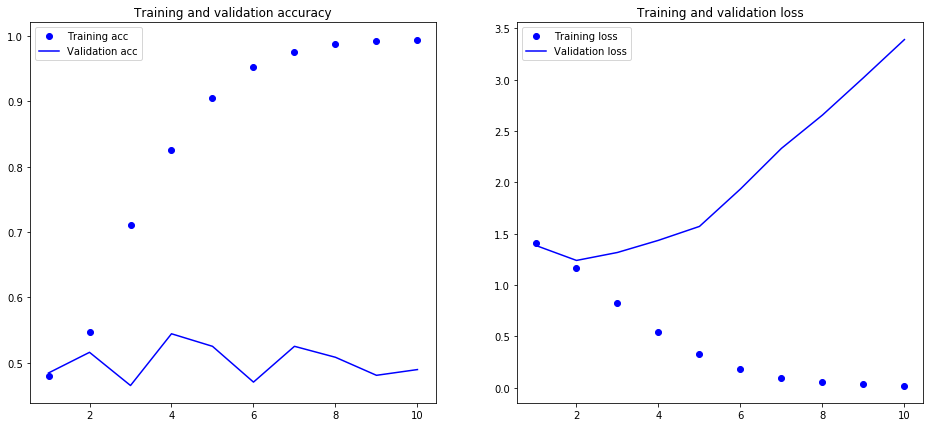

In [116]:
h0 = train_model(m0, x_train, one_hot_labels)
plot_history(h0)

# Model nro.2 using CNN + Conv1D

And here we can use that function what was made earlier for training and demostrations.

In [191]:
def train_model(model, x, y, e = 10, bs = 32, v = 1, vs = 0.25):
    h = model.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs)
    return h




# Lets Create a basic Sequential model with several Conv1D layers
This model was hard to make, so i doesen't get good acc.

prosses of training and models and layers that are used.

- Embending (Turns positive integers (indexes) into dense vectors of fixed size.)
- 1D convolution layer (This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs.)
- pooling (MaxPooling1D temporal data takes the max vector over the steps dimension and constrains to a pool_size for each stride.)
- dropout (Dropout is a technique where randomly selected neurons are ignored during training.)
- Dence (Dense is just a regular layer of neurons in a neural network.)
- Flatten (Flattening a tensor is to remove all of the dimensions except for one)

In [192]:
model = Sequential()

model.add(Embedding(1600, 3, input_length = 500))
model.add(Conv1D(50, 10, activation = 'relu', input_shape = (161297, 7)))
model.add(Conv1D(50, 10, activation = 'relu'))
model.add(MaxPooling1D(pool_size = (2)))
model.add(Dropout(0.25))

model.add(Conv1D(50, 10, activation = 'relu'))
model.add(Conv1D(50, 10, activation = 'relu'))
model.add(MaxPooling1D(pool_size = (2)))
model.add(Dense(32, activation = 'softmax'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'softmax'))
model.add(Dropout(0.25))
model.add(Dense(7, activation = 'softmax'))

from keras import backend
#def rmse(y_true, y_pred):
#    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd,
             loss='categorical_crossentropy', 
              metrics = ["accuracy", "mse", rmse])

vinkki_info = """ All possible options for model.compile
For more details, see: https://keras.io/models/model/
model.compile( 
    optimizer, 
    loss = None, 
    metrics = None, 
    loss_weights = None, 
    sample_weight_mode = None, 
    weighted_metrics = None,
    target_tensors = None)
"""
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_74 (Embedding)     (None, 500, 3)            4800      
_________________________________________________________________
conv1d_131 (Conv1D)          (None, 491, 50)           1550      
_________________________________________________________________
conv1d_132 (Conv1D)          (None, 482, 50)           25050     
_________________________________________________________________
max_pooling1d_47 (MaxPooling (None, 241, 50)           0         
_________________________________________________________________
dropout_124 (Dropout)        (None, 241, 50)           0         
_________________________________________________________________
conv1d_133 (Conv1D)          (None, 232, 50)           25050     
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 223, 50)           25050     
__________

# Here we TRAIN the firs CNN model


In [193]:
h10 = train_model(model, x_train, one_hot_labels)


Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 28s 4ms/step - loss: 1.4061 - acc: 0.4860 - mean_squared_error: 0.0993 - rmse: 0.3038 - val_loss: 1.3958 - val_acc: 0.4808 - val_mean_squared_error: 0.0994 - val_rmse: 0.3061
Epoch 2/10
7500/7500 [==============================] - 26s 3ms/step - loss: 1.3766 - acc: 0.4887 - mean_squared_error: 0.0985 - rmse: 0.3028 - val_loss: 1.3968 - val_acc: 0.4808 - val_mean_squared_error: 0.0998 - val_rmse: 0.3008
Epoch 3/10
7500/7500 [==============================] - 26s 4ms/step - loss: 1.3779 - acc: 0.4887 - mean_squared_error: 0.0987 - rmse: 0.3027 - val_loss: 1.3923 - val_acc: 0.4808 - val_mean_squared_error: 0.0996 - val_rmse: 0.3074
Epoch 4/10
7500/7500 [==============================] - 27s 4ms/step - loss: 1.3749 - acc: 0.4887 - mean_squared_error: 0.0985 - rmse: 0.3026 - val_loss: 1.3900 - val_acc: 0.4808 - val_mean_squared_error: 0.0994 - val_rmse: 0.3064
Epoch 5/10
7500/7500 [======

# Lets plot the train

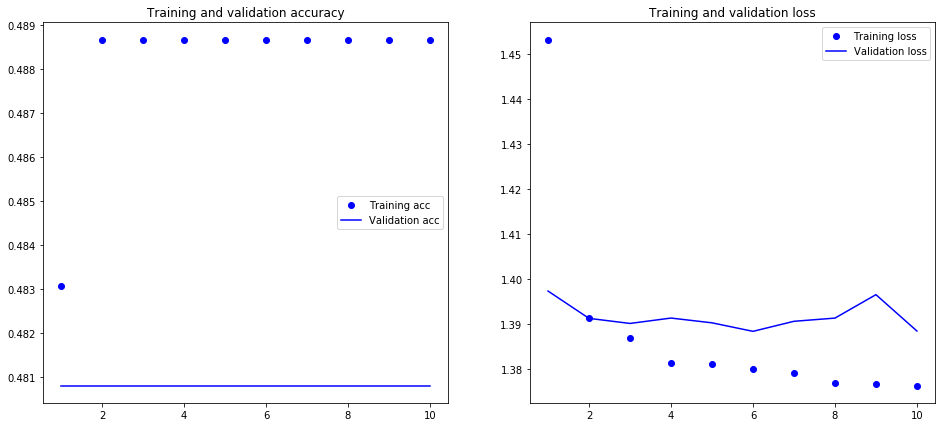

In [121]:
plot_history(h1)


# .....................................................................................................

# Model nro.3  LSTM / RNN
prosses of training and here's 1 new layer in use.

- A LSTM (Long Short-Term Memory layer - Hochreiter 1997.)
LSTM network is a kind of recurrent neural network. A recurrent neural network is a neural network that attempts to model time or sequence dependent behaviour – such as language, stock prices, electricity demand and so on.



In [ ]:
def train_model(model2, x, y, e = 10, bs = 32, v = 1, vs = 0.25):
    h2 = model2.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs)
    return h2

In [194]:

max_features = 1000 # Cut texts after this number of words. Thougs in this case, it is not needed...
maxlen = 500
batch_size = 64

print('Loading data...')

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

#x_train = np.array(x_train)
#x_test = np.array(x_test)

model2 = Sequential()
model2.add(Embedding(max_features, batch_size, input_length=maxlen))
model2.add(LSTM(32))
model2.add(Dropout(0.25))
model2.add(Dense(16, activation="sigmoid"))

model2.add(Dense(32, activation = "relu"))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation = "relu"))
model2.summary()

# try using different optimizers and different optimizer configs
model2.compile("adam", "binary_crossentropy", metrics=["acc"])


Loading data...
10000 train sequences
10000 test sequences
Pad sequences (samples x time)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_75 (Embedding)     (None, 500, 64)           64000     
_________________________________________________________________
lstm_41 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_127 (Dropout)        (None, 32)                0         
_________________________________________________________________
dense_154 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_155 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_128 (Dropout)        (None, 32)                0         
____________________________________________________

# Training of the model
Train the third model and plot the history

 
Train...
Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 33s 4ms/step - loss: 1.0261 - acc: 0.8537 - val_loss: 0.7696 - val_acc: 0.8571
Epoch 2/10
7500/7500 [==============================] - 31s 4ms/step - loss: 0.4669 - acc: 0.8571 - val_loss: 0.3236 - val_acc: 0.8571
Epoch 3/10
7500/7500 [==============================] - 31s 4ms/step - loss: 0.3231 - acc: 0.8597 - val_loss: 0.3198 - val_acc: 0.8571
Epoch 4/10
7500/7500 [==============================] - 31s 4ms/step - loss: 0.3197 - acc: 0.8611 - val_loss: 0.3100 - val_acc: 0.8659
Epoch 5/10
7500/7500 [==============================] - 31s 4ms/step - loss: 0.3072 - acc: 0.8700 - val_loss: 0.3054 - val_acc: 0.8682
Epoch 6/10
7500/7500 [==============================] - 30s 4ms/step - loss: 0.2993 - acc: 0.8759 - val_loss: 0.2953 - val_acc: 0.8811
Epoch 7/10
7500/7500 [==============================] - 31s 4ms/step - loss: 0.3089 - acc: 0.8658 - val_loss: 0.3092 - val_acc: 0.8

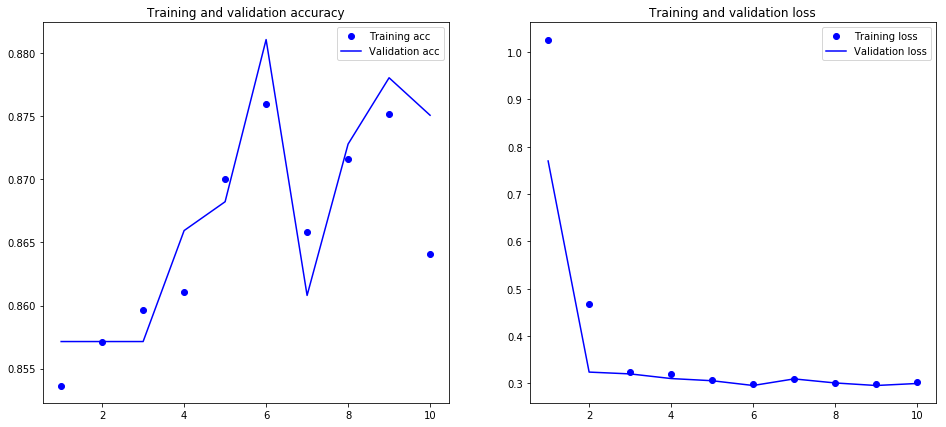

In [195]:

print(" ")
print("Train...")
h1 = train_model(model2, x_train, one_hot_labels)
plot_history(h1)

Running the train data reveals an accuracy of 85%.

 # .....................................................................................................


# Model nro.4 CNN + Conv1D and MaxPooling with a bit of spices


In [245]:
def train_model(model3, x, y, e = 5, bs = 64, v = 1, vs = 0.25):
    h3 = model3.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs)
    return h3


In [256]:
model3 = Sequential()
#model3.add(Embedding(1000, 64, input_length = 500))

#model3.add(Conv1D(100, 10, activation='relu', input_shape=(train_shape,)))
#model3.add(Conv1D(100, 10, activation='relu'))
#model3.add(MaxPooling1D(3))
#model3.add(Dense(32, activation='relu'))
#model3.add(Conv1D(160, 10, activation='relu'))
#model3.add(Conv1D(160, 10, activation='relu'))
#model3.add(Flatten())
#model3.add(Dropout(0.5))
#model3.add(Dense(7, activation='softmax'))



model3 = Sequential()
model3.add(Embedding(1000, 64, input_length = 500))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(MaxPooling1D(5))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(MaxPooling1D(5))
model3.add(Conv1D(128, 5, activation='relu'))
model3.add(MaxPooling1D(10))               # Global max pooling
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(7, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(optimizer = sgd,
             loss='categorical_crossentropy', 
              metrics = ["accuracy", "mse", rmse])

print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_100 (Embedding)    (None, 500, 64)           64000     
_________________________________________________________________
conv1d_227 (Conv1D)          (None, 496, 128)          41088     
_________________________________________________________________
max_pooling1d_84 (MaxPooling (None, 99, 128)           0         
_________________________________________________________________
conv1d_228 (Conv1D)          (None, 95, 128)           82048     
_________________________________________________________________
max_pooling1d_85 (MaxPooling (None, 19, 128)           0         
_________________________________________________________________
conv1d_229 (Conv1D)          (None, 15, 128)           82048     
_________________________________________________________________
max_pooling1d_86 (MaxPooling (None, 1, 128)            0         
__________

Train on 7500 samples, validate on 2500 samples
Epoch 1/5
7500/7500 [==============================] - 21s 3ms/step - loss: 1.4907 - acc: 0.4852 - mean_squared_error: 0.1023 - rmse: 0.3104 - val_loss: 1.3953 - val_acc: 0.4808 - val_mean_squared_error: 0.0997 - val_rmse: 0.3012
Epoch 2/5
7500/7500 [==============================] - 19s 3ms/step - loss: 1.3756 - acc: 0.4887 - mean_squared_error: 0.0985 - rmse: 0.3027 - val_loss: 1.3931 - val_acc: 0.4808 - val_mean_squared_error: 0.0995 - val_rmse: 0.3019
Epoch 3/5
7500/7500 [==============================] - 19s 2ms/step - loss: 1.3759 - acc: 0.4887 - mean_squared_error: 0.0986 - rmse: 0.3026 - val_loss: 1.3960 - val_acc: 0.4808 - val_mean_squared_error: 0.0998 - val_rmse: 0.3083
Epoch 4/5
7500/7500 [==============================] - 20s 3ms/step - loss: 1.3755 - acc: 0.4887 - mean_squared_error: 0.0986 - rmse: 0.3027 - val_loss: 1.3928 - val_acc: 0.4808 - val_mean_squared_error: 0.0995 - val_rmse: 0.3060
Epoch 5/5
7500/7500 [===========

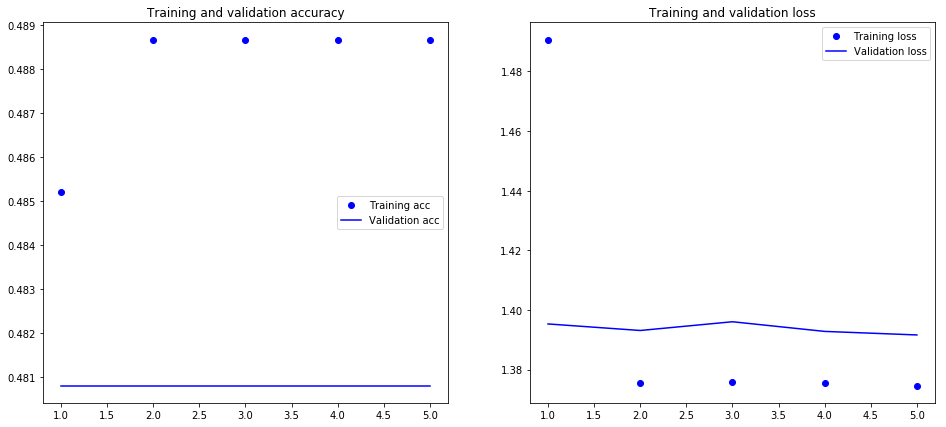

In [257]:
h1 = train_model(model3, x_train, one_hot_labels)
plot_history(h1)

------------------------------------------------------------------------------------------------------------------------------

For final comments and summary, i can note that 